In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np


def create_data():
    features = np.array(
        [
            [2.88, 3.05],
            [3.1, 2.45],
            [3.05, 2.8],
            [2.9, 2.7],
            [2.75, 3.4],
            [3.23, 2.9],
            [3.2, 3.75],
            [3.5, 2.9],
            [3.65, 3.6],
            [3.35, 3.3],
        ]
    )
    labels = ["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"]
    return features, labels

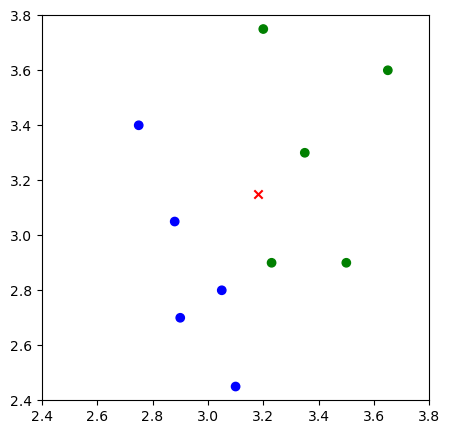

In [5]:
features, labels = create_data()
df = pd.DataFrame(features, columns=["x", "y"])
df["label"] = labels
plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))
plt.scatter(df["x"], df["y"], c=df["label"].apply(lambda x: "b" if x == "A" else "g"))
plt.scatter([3.18], [3.15], c="r", marker="x") 

In [12]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [6]:
arr = {"A": 3, "B": 2, "C": 6, "D": 5}


In [9]:
def majority_vote(class_count):
    sorted_class_count = sorted(class_count.items(), key=lambda x: x[1], reverse=True) # .items() 的作用是将字典转换为元组列表
    return sorted_class_count

majority_vote(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

In [16]:
def knn(train_data, label, test_data, k):
    distances = [euclidean_distance(test_data, x) for x in train_data]
    sorted_indices = np.argsort(distances)
    class_count = {}
    for i in range(k):
        vote_label = label[sorted_indices[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1

    return majority_vote(class_count), distances[sorted_indices[k - 1]]

In [21]:
KNN, r = knn(features, labels, np.array([3.18, 3.15]), 5)

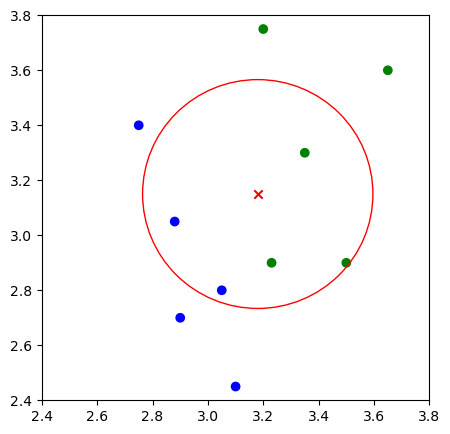

In [25]:
features, labels = create_data()
df = pd.DataFrame(features, columns=["x", "y"])
df["label"] = labels
plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))
plt.scatter(df["x"], df["y"], c=df["label"].apply(lambda x: "b" if x == "A" else "g"))
plt.scatter([3.18], [3.15], c="r", marker="x") 
# 半径为r的圆
circle = plt.Circle((3.18, 3.15), r + 0.01, color='r', fill=False)
plt.gca().add_artist(circle)



In [26]:
from ipywidgets import interact, fixed

def change_k(test_data, features, k):
    KNN, r = knn(features, labels, np.array([3.18, 3.15]), k)
    df = pd.DataFrame(features, columns=["x", "y"])
    df["label"] = labels
    plt.figure(figsize=(5, 5))
    plt.xlim((2.4, 3.8))
    plt.ylim((2.4, 3.8))
    plt.scatter(df["x"], df["y"], c=df["label"].apply(lambda x: "b" if x == "A" else "g"))
    plt.scatter([3.18], [3.15], c="r", marker="x") 
    # 半径为r的圆
    circle = plt.Circle((3.18, 3.15), r + 0.01, color='r', fill=False)
    plt.gca().add_artist(circle)


In [27]:
interact(change_k, test_data=fixed(features), features=fixed(features), k=(1, 10, 1))

interactive(children=(IntSlider(value=5, description='k', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.change_k(test_data, features, k)>